### Welcome to the Southern Water Corp Python Case Study!

While working on the Financial unit, you used Microsoft Excel's data analytics capabilities to analyze Southern Water Corp's data.

Now, Joanna Luez — Southern Water Corp's Lead Scientist — has requested that you convert your earlier analysis in Excel to Python Code. After all, with all the formulas in Excel, it can be tricky for others with less experience in Excel to follow.

Excel is an excellent tool for adhoc analysis, but Python is an invaluable tool thanks to its advanced data analysis capabilities that only take a few lines of code to complete.

**Please note that this case study is composed of two parts** — once you have completed part 1, which involves descriptive statistics, please submit your work and discuss it with your mentor before moving on to part 2. 

### Let's get started!

---

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

Import the libraries you'll need for your analysis. You will need the following libraries:  

**Matplotlib** - This is Python's basic plotting library.
You'll use the pyplot and dates function collections from matplotlib throughout this case study so we encourage you to important these two specific libraries with their own aliases. Also, include the line **'%matplotlib inline'** so that your graphs are easily included in your notebook. You will need to import DateFormatter from matplotlib as well.

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodel.api** - This library will enable you to create statistical models. You will need this library when perfroming regession analysis in Part 2 of this case study.

## Place your code here

In [4]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
Unfortunately, the data you've received from Southern Water Corp has been split into three files: Desalination_Unit_File 001, Desalination_Unit_File_002, and Desalination_Unit_File_003. You'll need to merge them into a complete dataframe for your analysis. To do this, follow the steps below: 

i. Import each of the three separate files and merge them into one dataframe.  Suggested names: **(dataframe_1, dataframe_2, dataframe_3)**. Don't forget to use the **header** argument to ensure your columns have meaningful names! 

ii. Print descriptive statistics on your combined dataframe using **.describe()** and **.info()**

iii. Set "TIMEFRAME" as the index on your combined dataframe. 

In [6]:
#import three separate files. Use "header=1" on first dataframe to ensure columns have meaningful names
dataframe_1 = pd.read_csv(r'C:\Users\Lenovo\Desktop\Southern Water Corp Python Case Study\Desalination_Unit_File_001.csv',header=1)
dataframe_2 = pd.read_excel(r'C:\Users\Lenovo\Desktop\Southern Water Corp Python Case Study\Desalination_Unit_File_002.xlsx',header=1)
dataframe_3 = pd.read_excel(r'C:\Users\Lenovo\Desktop\Southern Water Corp Python Case Study\Desalination_Unit_File_003.xlsx',header=1)

#vertically merge files using pd.concat
df = pd.concat([dataframe_1,dataframe_2,dataframe_3])

#drop missing values
df = df.dropna()

#print descriptive statistics on combined dataframe
print(df.describe())
print(df.info())

#set "TIMEFRAME" as index on combined dataframe
df.set_index("TIMEFRAME",inplace=True)

       SURJEK_FLOW_METER_1  SURJEK_FLOW_METER_2  ROTATIONAL_PUMP_RPM  \
count          6997.000000          6997.000000          6997.000000   
mean              5.947058             5.159499             6.608110   
std              20.352811            24.445774            20.844371   
min              -0.527344            -9.118652            -1.000000   
25%               0.000000            -4.765337            -0.687126   
50%               0.314582            -0.351562            -0.013292   
75%               0.704173             0.981556             0.000000   
max             127.221700           313.989300            99.000000   

       SURJEK_PUMP_TORQUE  MAXIMUM_DAILY_PUMP_TORQUE  \
count         6997.000000                6997.000000   
mean            39.097537                 427.357071   
std            124.182122                 473.256491   
min             -2.436085                  -2.278918   
25%             -2.030355                   9.283683   
50%            

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

When you look at your dataframe, you should now be able to see the upper and lower quartiles for each row of data. You should now also have a rough sense of the number of entires in each dataset. However, just as you learned when using Excel, creating a visualization of the data using Python is often more informative than viewing the table statistics. Next up — convert the tables you created into a boxplot by following these instructions:

i) Create a boxplot from your combined dataframe using **matplotlib and seaborn** with all the variables plotted out. Note: do any particular variables stand out to you? Title your visualization **"Boxplot for all attributes"** and set the boxplot size to 25 x 5.

### Please put your code here


Text(0.5, 1.0, 'Boxplot for all attributes')

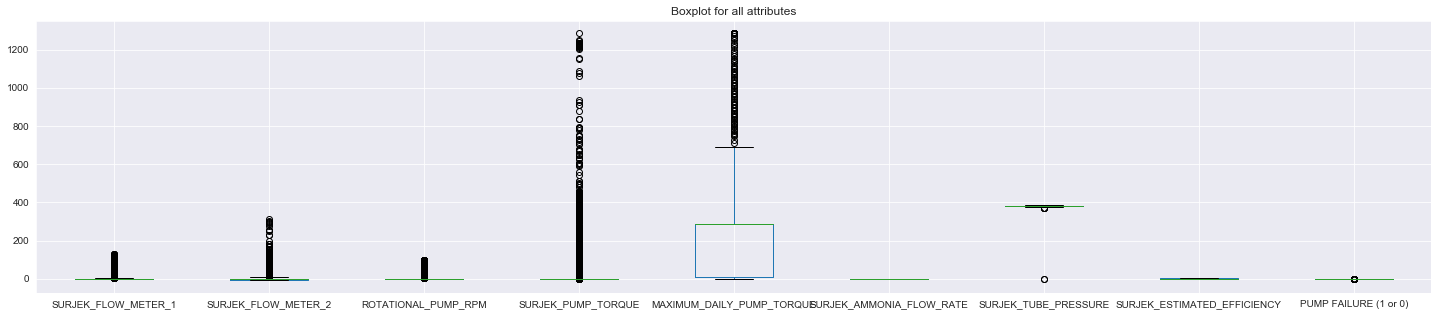

In [7]:
#set dark grid style using Seaborn
sns.set_style("darkgrid")

#create boxplot with 25 x 5 size
df.boxplot(figsize=(25,5))

#add title
plt.title("Boxplot for all attributes")

#### You would probably note that it might seem that some variables, due to their range and size of values, dwarfs some of the other variables which makes the variation difficult to see.
#### Perhaps, we should remove these variables and look at the box plot again?

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Create a Filtered Boxplot</span>  
i) Create the same boxplot from  <span style="color:green">Step 3</span>, but this time, filter out SURJEK_PUMP_TORQUE and MAXIMUM_DAILY_PUMP_TORQUE. Create a new dataframe and apply a filter named **'dataframe_filt'**. Title this boxplot 'Boxplot without Pump Torque, or Max Daily Pump Torque'.  We have provided the filter list for you.

**Open-ended question:**

Beyond pump torque and max daily pump torque, do any other attributes seem to 'stand out'?

## Please put your code here

Text(0.5, 1.0, 'Boxplot without Pump Torque, or Max Daily Pump Torque')

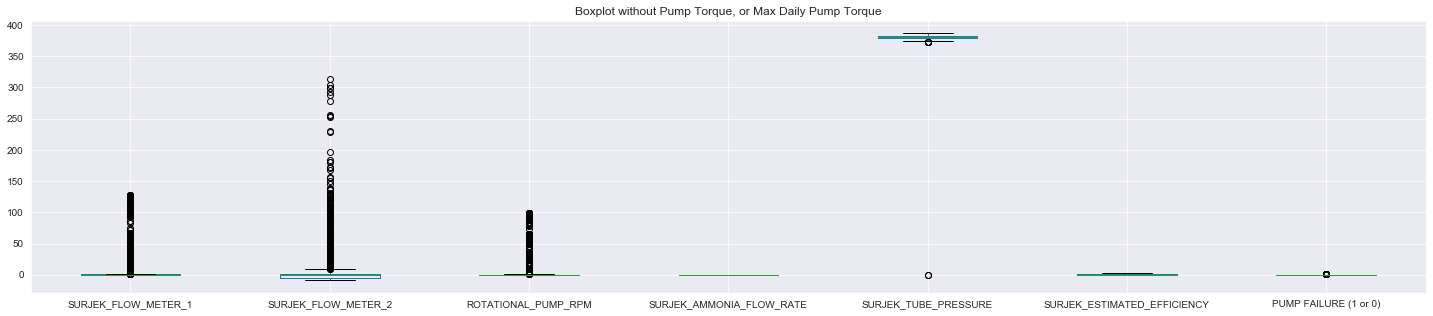

In [8]:
#create list of columns to be included
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)'] 

#set dark grid style using Seaborn
sns.set_style("darkgrid")

#create boxplot with 25 x 5 size, showing only columns in filt list
df[filt].boxplot(figsize=(25,5))

#add title
plt.title("Boxplot without Pump Torque, or Max Daily Pump Torque")

---------------------------------------------------------------------------

### Step 5: <span style="color:green">Filter Your Boxplot by Column Value</span> 

i) Using the whole dataset, create another boxplot using the whole dataset but this time, compare the distributions for when Pump Failure is 1 (The Pump has failed) and 0 (Pump is in normal operations). You will be creating two boxplots using the 'PUMP FAILURE (1 or 0)' column in the dataset. We have provided a few lines of code to get you started. Once complete, you should be able to see how much quicker it is to apply filters in Python than it is in Excel. 

Note: Please display the two boxplots side-by-side. You can do this by creating a shared X axis or by creating two axes and looping through them while using the pyplot command.

**Open-ended Question:**

What variables seem to have the largest variation when the Pump has failed?


## Please put your code here

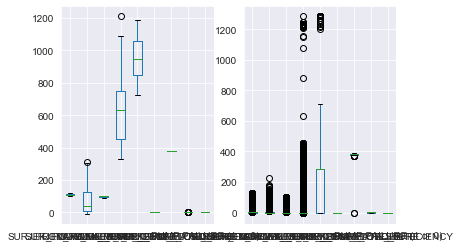

In [9]:
#set dark grid style using Seaborn
sns.set_style("darkgrid")

#create two Pandas series, one for pump failure, and one when pump is in normal operations
pump_failed = df["PUMP FAILURE (1 or 0)"]==1
pump_normal = df["PUMP FAILURE (1 or 0)"]==0

#create boxplot with 25 x 5 size, showing only columns in filt list and pump in failure mode
plt.subplot(1,2,1)
df[pump_failed].boxplot(figsize=(25,5))

# gave the incorrect submission: df[filt][pump_failed].boxplot(figsize=(25,5))

#create boxplot with 25 x 5 size, showing only columns in filt list and pump in normal mode
plt.subplot(1,2,2)
df[pump_normal].boxplot(figsize=(25,5))

# gave the incorrect submission: df[filt][pump_normal].boxplot(figsize=(25,5))


### From analysing the boxplots, you'll notice that there seem to be a number of outliers.
When you did this work in Excel, you used the interquartile ranges to remove the outliers from each column. Happily, Python allows you to do this same process more quickly and efficiently, as you'll see when working on  <span style="color:green">Step 6</span>.

---------------------------------------------------------------------------

### Step 6: <span style="color:green">Create Quartiles</span> 

i) Create two new variables called Q1 and Q3. q1 should contain the 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile for all the columns in the dataframe.

ii) Calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.

## Please put your code here

In [10]:
#calculate 25th and 75th percentile for all columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

#calculate interquartile range for all columns
df_iqr = Q3 - Q1

#print 25th percentile, 75th percentile, and interquartile range for all columns
print(Q1)
print(Q3)
print(df_iqr)

SURJEK_FLOW_METER_1              0.000000
SURJEK_FLOW_METER_2             -4.765337
ROTATIONAL_PUMP_RPM             -0.687126
SURJEK_PUMP_TORQUE              -2.030355
MAXIMUM_DAILY_PUMP_TORQUE        9.283683
SURJEK_AMMONIA_FLOW_RATE         0.000000
SURJEK_TUBE_PRESSURE           379.028300
SURJEK_ESTIMATED_EFFICIENCY      0.000000
PUMP FAILURE (1 or 0)            0.000000
Name: 0.25, dtype: float64
SURJEK_FLOW_METER_1              0.704173
SURJEK_FLOW_METER_2              0.981556
ROTATIONAL_PUMP_RPM              0.000000
SURJEK_PUMP_TORQUE              -1.680896
MAXIMUM_DAILY_PUMP_TORQUE      285.493400
SURJEK_AMMONIA_FLOW_RATE         0.000000
SURJEK_TUBE_PRESSURE           382.690400
SURJEK_ESTIMATED_EFFICIENCY      1.240822
PUMP FAILURE (1 or 0)            0.000000
Name: 0.75, dtype: float64
SURJEK_FLOW_METER_1              0.704173
SURJEK_FLOW_METER_2              5.746893
ROTATIONAL_PUMP_RPM              0.687126
SURJEK_PUMP_TORQUE               0.349459
MAXIMUM_DAILY_PUMP_TOR

---------------------------------------------------------------------------

### Step 7: <span style="color:green">Identify Outliers</span> 

How many outliers do you have? What will happen to your dataset if you remove them all? Let's find out!

i) Calculate how many entries you currently have in the original dataframe.

ii) Using the quartiles and IQR previously calculated, identify the number of entries you'd have if you were to remove the outliers.

ii) Find the proportion of outliers that exist in the dataset.

Ensure your dataframe doesn't include the attribute TIMEFRAME - if it does, please drop this attribute for now.


## Please put your code here

In [11]:
#remove timeframe index
df_no_tf = pd.DataFrame.reset_index(df)

#calculate number of rows in dataset (aside from index) by inspecting df_no_tf: 6998

df_no_tf.info()
total_rows = 6997

#calculate the first low outlier datapoint for each column 
low_outlier_series = Q1-(1.5*df_iqr)

#calculate the first high outlier datapoint for each column 
high_outlier_series = Q3+(1.5*df_iqr)

#from the df_no_tf dataframe, remove all rows that contain at least one outlier

df_no_outliers = df_no_tf[(df_no_tf["MAXIMUM_DAILY_PUMP_TORQUE"] >-405) & (df_no_tf["MAXIMUM_DAILY_PUMP_TORQUE"] <699.8) 
                    & (df_no_tf["ROTATIONAL_PUMP_RPM"] >-1.7)& (df_no_tf["ROTATIONAL_PUMP_RPM"] <1)
                    & (df_no_tf["SURJEK_ESTIMATED_EFFICIENCY"] >-1.9)& (df_no_tf["SURJEK_ESTIMATED_EFFICIENCY"] <3.1)
                    & (df_no_tf["SURJEK_FLOW_METER_1"] >-1.1)& (df_no_tf["SURJEK_FLOW_METER_1"] <1.8)
                    & (df_no_tf["SURJEK_FLOW_METER_2"] >-13.4)& (df_no_tf["SURJEK_FLOW_METER_2"] <9.6)
                    & (df_no_tf["SURJEK_PUMP_TORQUE"] >-2.6)& (df_no_tf["SURJEK_PUMP_TORQUE"] <-1.2)
                    & (df_no_tf["SURJEK_TUBE_PRESSURE"] >373.5)& (df_no_tf["SURJEK_TUBE_PRESSURE"] <388.2)]

df_no_outliers.info()

#calculate outliers as a proportion of the entire dataframe

#total rows containing no outliers: 3840
#total rows including outliers: 6997
#total number of outliers: 6997 - 3840 = 3157

#calculate what percentage of the dataframe are outliers
percentage_outliers = 100 * ((6997 - 3840) / 6997)
print(percentage_outliers)

#print summary of findings
print("When we have not removed any outliers from the dataset, we have 6997 entries")
print("The proportion of rows within the dataframe containing at least one outlier is 45.1 percent")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6997 entries, 0 to 6996
Data columns (total 10 columns):
TIMEFRAME                      6997 non-null object
SURJEK_FLOW_METER_1            6997 non-null float64
SURJEK_FLOW_METER_2            6997 non-null float64
ROTATIONAL_PUMP_RPM            6997 non-null float64
SURJEK_PUMP_TORQUE             6997 non-null float64
MAXIMUM_DAILY_PUMP_TORQUE      6997 non-null float64
SURJEK_AMMONIA_FLOW_RATE       6997 non-null float64
SURJEK_TUBE_PRESSURE           6997 non-null float64
SURJEK_ESTIMATED_EFFICIENCY    6997 non-null float64
PUMP FAILURE (1 or 0)          6997 non-null float64
dtypes: float64(9), object(1)
memory usage: 546.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 413 to 5173
Data columns (total 10 columns):
TIMEFRAME                      3853 non-null object
SURJEK_FLOW_METER_1            3853 non-null float64
SURJEK_FLOW_METER_2            3853 non-null float64
ROTATIONAL_PUMP_RPM            3853 non-nul

---------------------------------------------------------------------------

### Step 8: <span style="color:green">Create a Boxplot without Outliers</span> 

With the dataset now stripped of outliers, create the following boxplots:

i) A boxplot when PUMP FAILURE is 1

ii) A boxplot when PUMP FAILURE is 0 

#### Note 1: Removing outliers is very situational and specific. Outliers can skew the dataset unfavourably; however, if you are doing a failure analysis, it is likely those outliers actually contain valuable insights you will want to keep as they represent a deviation from the norm that you'll need to understand. 


#### Note 2: Please display the two boxplots side-by-side. You can do this by creating a shared X axis or by creating two axes and looping through them while using the pyplot command.


## Please put your code here

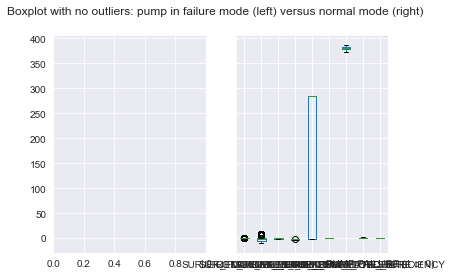

In [12]:
#set dark grid style using Seaborn
sns.set_style("darkgrid")

#create two Pandas dataframes, one for pump failure, and one when pump is in normal operations
pump_failure_no_outliers = df_no_outliers[df_no_outliers["PUMP FAILURE (1 or 0)"]==1] 
pump_normal_no_outliers = df_no_outliers[df_no_outliers["PUMP FAILURE (1 or 0)"]==0] 

#plot boxplots
f, axes = plt.subplots(1, 2, sharey=True)
f.suptitle("Boxplot with no outliers: pump in failure mode (left) versus normal mode (right)")
matplotlib.rcParams['figure.figsize'] = (15,5)
pump_failure_no_outliers.boxplot()
pump_normal_no_outliers.boxplot()


### Based on the boxplots you've created, you've likely come to the conclusion that, for this case study, you actually _shouldn't_ remove the outliers, as you are attempting to understand the Pump Failure Behavior.

-----

### Step 9: <span style="color:green">Plot and Examine Each Column</span> 
We have provided a filtered column list for you.   

Using a loop, iterate through each of the Column Names and plot the data. (You can either make your X-axis the Timeframe variable or you can leave it blank and use the row numbers as an index). 

Find the minimum (min) and maximum (max) time in the dataframe. Use Tight_layout. Include a title with min and max time. 

**Note:** For each plot, ensure that you have a dual axis set up so you can see the Pump Behaviour (0 or 1) on the second Y-axis, and the attribute (e.g. SURJEK_FLOW_METER_1) on the first Y-Axis. It might be helpful to give the failureState it's own color and add a legend to the axis to make it easier to view. 

Check out this link to learn how to do this: https://matplotlib.org/gallery/api/two_scales.html

##### Note: Please ensure that the dataframe you are plotting contains all the outliers and that the Pump Failure Behaviour includes both the 0 and 1 State.

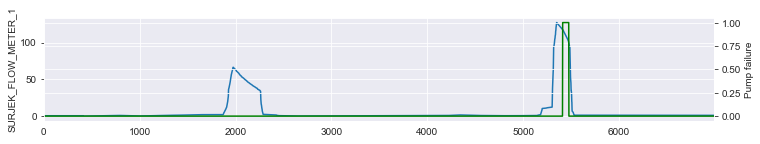

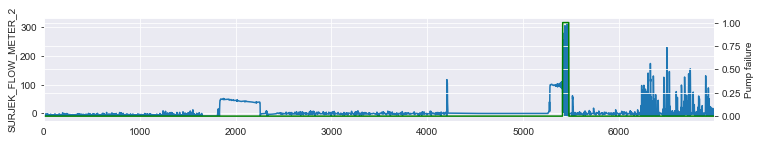

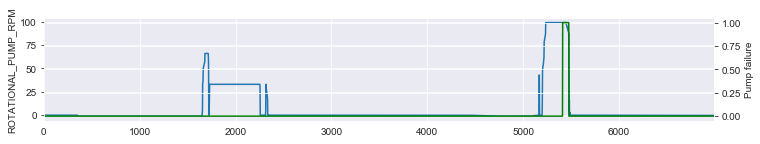

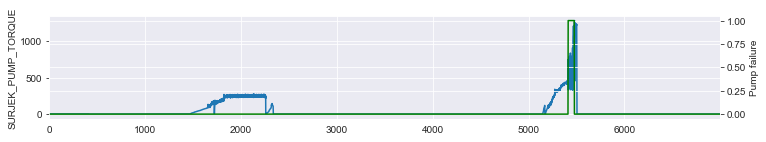

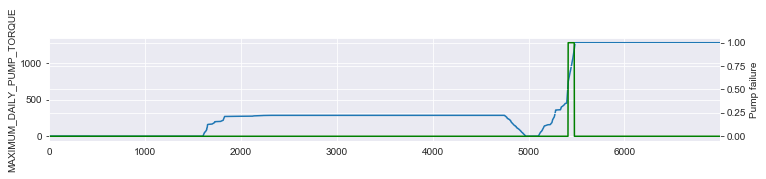

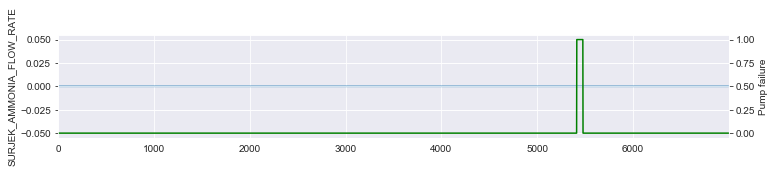

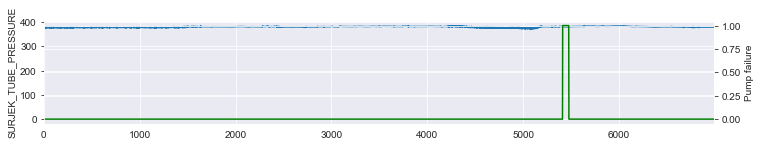

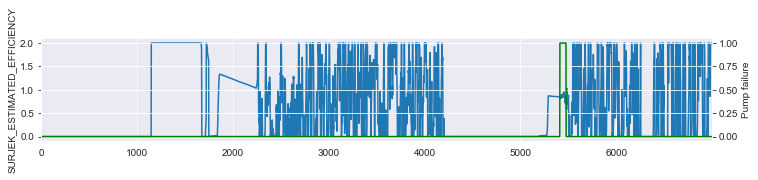

In [13]:
#create new dataframe (so "TIMEFRAME" is no longer the index. We will use row numbers as index)
df2 = pd.concat([dataframe_1,dataframe_2,dataframe_3])

df2 = df2.dropna()

df2 = df2.reset_index()

#create list of variables to iterate over (for left y-axis)
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']

colList = df2[filt].columns

#create pump failure variable (for right y-axis)
filt2 = ['PUMP FAILURE (1 or 0)']

#assign figsize
matplotlib.rcParams['figure.figsize'] = (10,2)

#create "index" variable to be used as x-axis on each chart
index = df2.index

for col in df2[filt]:
    sns.set_style("darkgrid")
    plt.subplots()
    plt.tight_layout()
    plt.ylabel(col)
    ax = df2[col].plot()
    ax2 = ax.twinx()
    ax2.set_ylabel("Pump failure")
    ax2.plot(df2[filt2],color="green")
    


Of course, given that all the attributes have varying units, you might need more than one plot to make sense of all this data. For this next step, let's view the information by comparing the <b>ROLILNG DEVIATIONS</b> over a 30-point period.

As the deviations will likely be a lot lower, the scale should be much simpler to view on one plot.
Make sure that you include the 'PUMP FAILURE 1 or 0' attribute on the secondary Y-axis. 

#### Hint: Remember to make use of the Dual-Axis plot trick you learned in the previous exercise!


---

### Step 10: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.


ii) Re-plot all variables for the time period 10/12/2014 14:40 to 10/12/2014 14:45, focusing specifically on the first Pump “Failure”. 


**Open-ended Question:**
Do any particular variables seem to move in relation to the failure event?

## Please put your code here

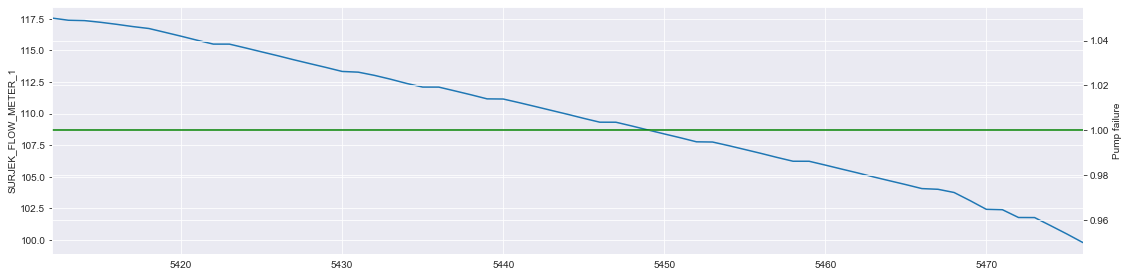

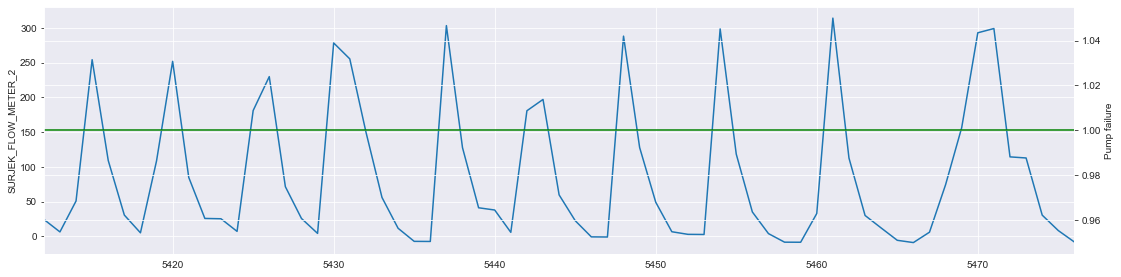

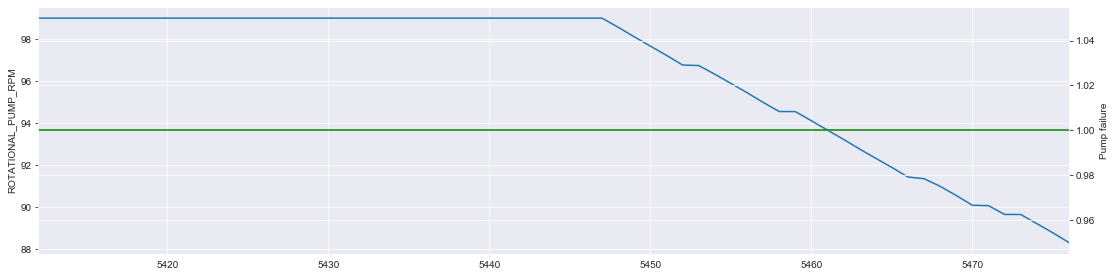

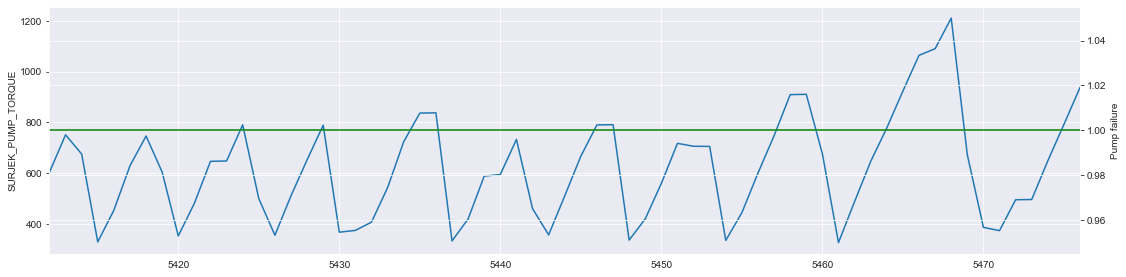

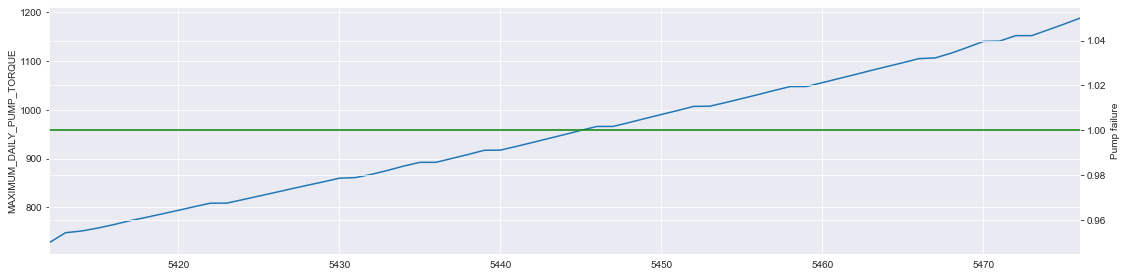

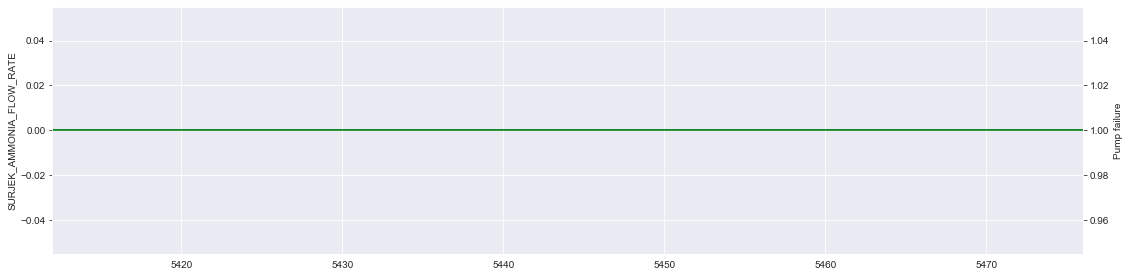

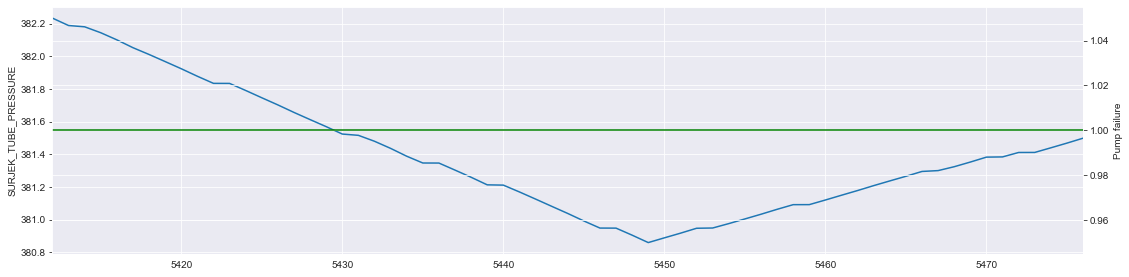

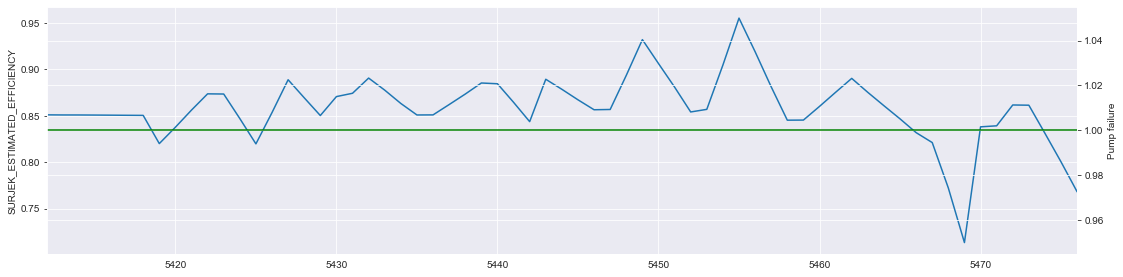

In [14]:
#Below is the first part of the code
from datetime import datetime

#concatenate dataframes, drop null values, and reset index
df3 = pd.concat([dataframe_1,dataframe_2,dataframe_3])
df3 = df3.dropna()
df3 = df3.reset_index()

#create lists to filter dataframe
df3['TIMEFRAME'] = pd.to_datetime(df3['TIMEFRAME']).apply(lambda x: x.strftime('%d/%m/%Y %H:%M:%S')if not pd.isnull(x) else '')
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)', 'TIMEFRAME']
filt2 = ['PUMP FAILURE (1 or 0)']
filt3 = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']
colList = df3[filt].columns
matplotlib.rcParams['figure.figsize'] = (15,4)

#calculate rolling standard deviations using a rolling window size of 30

rolling_df = df3.rolling(30).std()

#set pump failure mode to "failure" for rolling_df
rolling_df = df3[df3["PUMP FAILURE (1 or 0)"]==1]

#use for loop to output charts showing behaviour of variables during pump failure

for col in rolling_df[filt3]:
    sns.set_style("darkgrid")
    plt.subplots()
    plt.tight_layout()
    plt.ylabel(col)
    ax = rolling_df[col].plot()
    ax2 = ax.twinx()
    ax2.set_ylabel("Pump failure")
    ax2.plot(rolling_df[filt2],color="green")


## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

When you performed inferential statistics for Southern Water Corp using Excel, you made use of the data analysis package to create a heatmap using the correlation function. The heatmap showed the attributes that strongly correlated to Pump Failure. 

Now, you'll create a heatmap using Seaborn's heatmap function — another testament to the fact that having Matplotlib and Seaborn in your toolbox will allow you to quickly create beautiful graphics that provide key insights. 

### Step 11: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R Squared) for all variables (excluding those with consistent 0 values such as Ammonia Flow Rate).

**Note:** We have provided the filter list and created the dataframe for you. 

Link: (https://seaborn.pydata.org/generated/seaborn.heatmap.html)

## Please put your code here

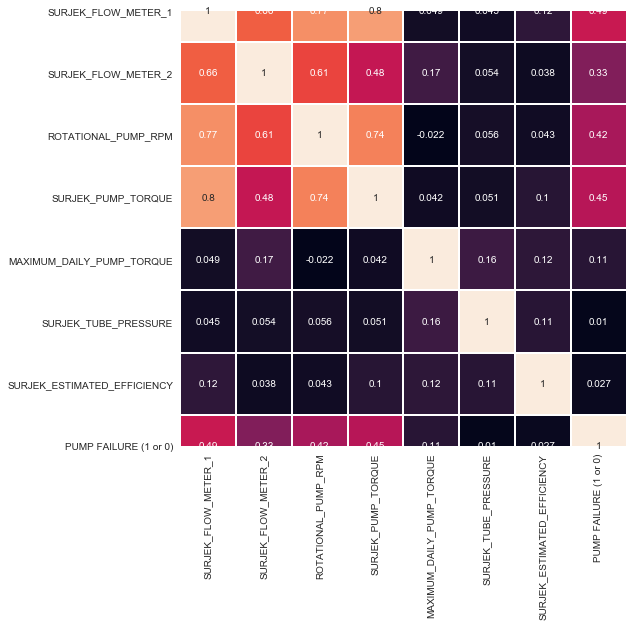

In [15]:
#Below is the first part of the code

#commented out the following 3 lines of pre-supplied code because of error message "TIMEFRAME" 
from datetime import datetime
#df['TIMEFRAME'] = pd.to_datetime(df['TIMEFRAME'], format="%d/%m/%Y %H:%M:%S", infer_datetime_format=True )
#df.set_index('TIMEFRAME', inplace=True)

filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)']

matrix = df[filt].corr()

plt.subplots(figsize=(8, 8))
heatmap = sns.heatmap(matrix, linewidths = 1, annot = True, cbar = False, vmin = 0, vmax = 1)



Note edges of the heatmap are cut off. Apparently a bug: https://github.com/mwaskom/seaborn/issues/1773

The variables most strongly correlated with pump failure are Surjek Flow Meter 1, Surjek Pump Torque, and Rotational Pump RPM.

**Open-ended Question:**

Which variables seem to correlate with Pump Failure?

### Step 12: <span style="color:purple">Create a Barplot of Correlated Features</span>
Create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order.

### Please put your code here

<BarContainer object of 7 artists>

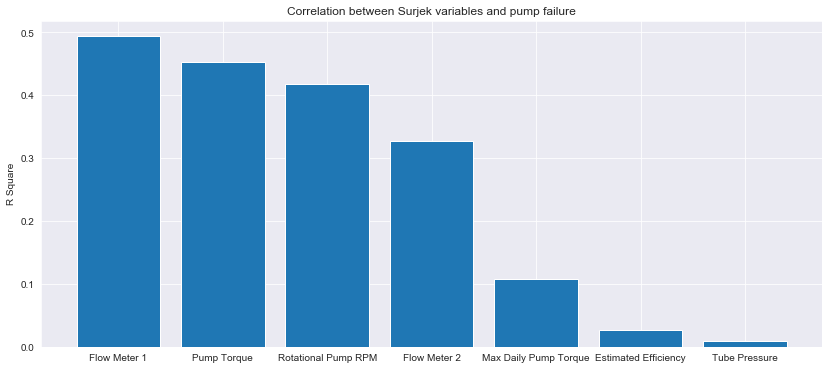

In [16]:
pump_matrix = matrix["PUMP FAILURE (1 or 0)"]


pump_matrix.head(10)

matrix_values = [0.494103,0.452760,0.417383,0.326739,0.107461,0.027132,0.009965]
matrix_labels = ["Flow Meter 1", "Pump Torque", "Rotational Pump RPM","Flow Meter 2","Max Daily Pump Torque","Estimated Efficiency","Tube Pressure"]

plt.subplots(figsize=(14,6))
plt.title("Correlation between Surjek variables and pump failure")
plt.ylabel("R Square")
plt.bar(matrix_labels,matrix_values)

#pump_dict = dict(pump_matrix)


#plt.bar(range(len(pump_dict)), list(pump_dict.values()), align='center')
#plt.xticks(range(len(pump_dict)), list(pump_dict.keys()))


#plt.show()

---

### Step 13: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
Previously, you created a correlation matrix using 'raw' variables. This time, you'll transform 'raw' variables using a rolling standard deviation. 

i) Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.

ii) Using the newly created rolling standard deviation dataframe, use the Seaborn heatmap function to replot this dataframe into a heatmap.

Do any variables stand out? If yes, list these out below your heatmap.

**Note:** We have provided the initial dataframe and filters.

## Please put your code here

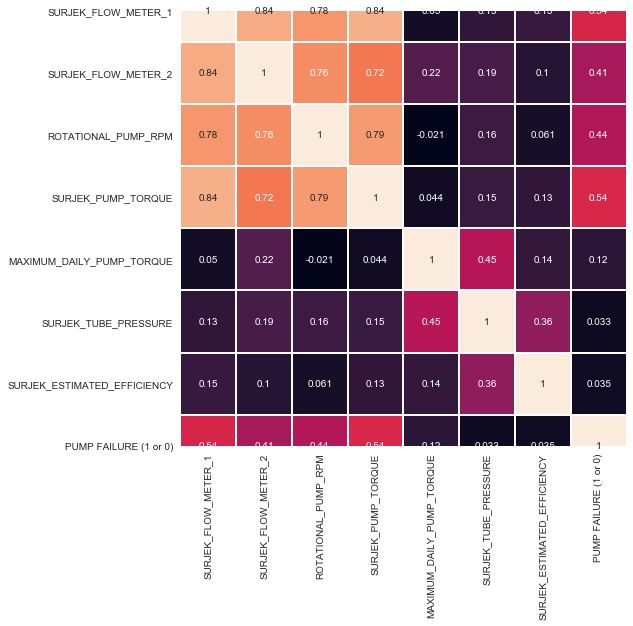

In [17]:
#Below is the first part of the code
#dataframe = pd.concat(combine)
#dataframe['TIMEFRAME'] = pd.to_datetime(dataframe['TIMEFRAME'], format="%d/%m/%Y %H:%M:%S", infer_datetime_format=True )
#dataframe.set_index('TIMEFRAME', inplace=True)

filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)']

df_rolling = df[filt].rolling(30).mean()

rolling_matrix = df_rolling.corr()

plt.subplots(figsize=(8, 8))
heatmap = sns.heatmap(rolling_matrix, linewidths = 1, annot = True, cbar = False, vmin = 0, vmax = 1)

As with the raw data heatmap, the variables most strongly correlated with Pump Failure are Surjek Flow Meter 1, Surjek Pump Torque, and Rotational Pump RPM. These correlations are more pronounced than with the raw data. A much stronger correlation with Surjek Flow Meter 2 than was evident in the raw data heatmap can also be seen here.

### Creating a Multivariate Regression Model


When you worked on this case study in Excel, you went through the tricky process of using the rolling standard deviation variables to generate a regression equation. Happily, this process is much simpler in Python.  

For this step, you'll be using the statsmodel.api library you imported earlier and calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### Step 14: <span style="color:purple">Use OLS Regression</span> 
i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables, which include every other variable that is not PUMP FAILURE (1 or 0). What is the R Squared for the model and what does this signify?

ii) Repeat i) but this time use the rolling standard deviation variables you created previously. What is the R Squared for the model and what does this signify?

**Open-ended Question:**

Which linear regression model seems to be a better fit?

**Note:** We have provided the initial dataframe and filter list.

## Please put your code here 

In [18]:
#Answer for step i): 
#Below is the first part of the code

indep = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']

dep = ["PUMP FAILURE (1 or 0)"]

reg1 = sm.OLS(endog=df[dep], exog=df[indep])
results = reg1.fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared (uncentered):                   0.271
Model:                               OLS   Adj. R-squared (uncentered):              0.270
Method:                    Least Squares   F-statistic:                              370.5
Date:                   Thu, 11 Jun 2020   Prob (F-statistic):                        0.00
Time:                           10:52:54   Log-Likelihood:                          7544.7
No. Observations:                   6997   AIC:                                 -1.508e+04
Df Residuals:                       6990   BIC:                                 -1.503e+04
Df Model:                              7                                                  
Covariance Type:               nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0

In [2]:
# create a list of all variables except TIMEFRAME
filters = ["SURJEK_FLOW_METER_1","SURJEK_FLOW_METER_2","ROTATIONAL_PUMP_RPM","SURJEK_PUMP_TORQUE","MAXIMUM_DAILY_PUMP_TORQUE","SURJEK_AMMONIA_FLOW_RATE","SURJEK_TUBE_PRESSURE","SURJEK_ESTIMATED_EFFICIENCY","PUMP FAILURE (1 or 0)"]

# drop empty values and apply 30-point rolling standard deviation to all variables in "filters"
rolling_vars = df[filters].rolling(30).std().dropna()

# create list of independent variables
indep_vars = ["SURJEK_FLOW_METER_1","SURJEK_FLOW_METER_2","ROTATIONAL_PUMP_RPM","SURJEK_PUMP_TORQUE","MAXIMUM_DAILY_PUMP_TORQUE","SURJEK_AMMONIA_FLOW_RATE","SURJEK_TUBE_PRESSURE","SURJEK_ESTIMATED_EFFICIENCY"]

# create dataframes filtered by dependent and independent variables
dep_var = df['PUMP FAILURE (1 or 0)'].rolling(30).mean().dropna()
indep = rolling_vars[indep_vars]

# create and run OLS model
reg2 = sm.OLS(endog=dep_var, exog=indep)
results2 = reg2.fit()
print(results2.summary())

NameError: name 'df' is not defined

Without applying a rolling standard deviation, the model produced an R-Squared value of 0.271; when rolling standard deviation was applied, this increased to 0.347. However, these are both significantly below the R-Squared value of 0.536 attained with the Excel multiple regression model.

Great job creating those regressive equations! You've reached the final step of this case study!
### Step 15: <span style="color:purple">Validate Predictions</span> 
i) Use the regression equation you created in the previous step and apply the .predict() function to the dataframe to see whether or not your model 'picks' up the Pump Failure Event.  

ii) Plot the rolling linear regression equation against the attribute 'PUMP FAILURE (1 or 0)'

**Note:** Please ensure all axes are clearly labelled and ensure that you use Dual Axes to plot this. Make the line widths wider than 1 so the plots are easier to see. We have provided the initial figure size.

## Please put your code here

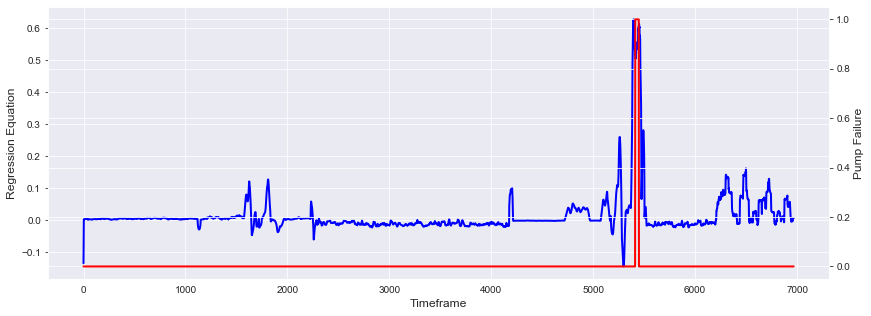

In [47]:
#apply .predict() to regression equation results
reg2_array = results2.predict()

#convert pump failure series to integer array
pump_array = dep_var.array.astype(int)

#create chart
fig, ax1 = plt.subplots(figsize=(14,5))

#create dual axis
ax2 = ax1.twinx()  

#create labels
ax1.set_ylabel('Regression Equation',size=12)
ax1.set_xlabel('Timeframe',size=12)
ax2.set_ylabel('Pump Failure',size=12)

#plot data from arrays
ax1.plot(reg2_array,color="blue",linewidth=2,label="Regression Equation")
ax2.plot(pump_array,color="red",linewidth=2,label="Pump Failure")

plt.show()

You've made it to the end of this challenging case study — well done! You've now converted all of the analysis you did for Southern Water Corp using Excel into Python. You created visualizations using Seaborn, manipulated datasets with pandas, and so much more! This case study was designed to give you practice using Python to analyze datasets both large and small — you can now apply these skills to work you do throughout your career as a data analyst.

## Great job! Being able to complete this case study means that you're now fluent in Python for data analysis! Congratulations!